# Assignment

Use the "from the expert" (FTE) jupyter notebook as a starter for this assignment, and ask your instructor questions if you need help.

Use the `churn_data.csv` file to carry out a similar EDA and visualization process as what we did in the FTE. Create at least 2 EDA plots, and create a HTML file with an auto-EDA analysis using pandas-profiling or another auto-EDA Python package. Write a short analysis at the end of the assignment in markdown. 

## Data science process steps this week
We will carry out the first two parts of the CRISP-DM data science process this week:

1. Business understanding

This is customer churn data for a telecommunications company. Customers can have phone as well as other services. The company is looking to reduce customer churn, where customers stop using the company's services and cancel their account. The 'Churn' column has a binary target, yes or no, that denotes if a customer churned. We want to create a machine learning model to predict the Churn target using the other available data in the dataset. Ideally, we will deploy this model to integrate with the company's database, so that a churn risk column is created for each customer. This will enable customer service reps and others to devise and use strategies to reduce churn.


2. Data understanding

Carry out some EDA as we did in the FTE, such as using pandas-profiling. Create a histogram like we did in the FTE, where we plot a numeric column with the target as the 'hue'. Optional challenge: create other plots with the target as the hue, such as bar plots for the categorical columns.

In [2]:
#Install pandas-profiling which is helpful for automatic EDA
#Proccess of EDA is to become familar with the data. We will look at m
!pip install pandas-profiling 

In [3]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

In [4]:
#read the csv file using pandas and store it into a dataframe 
data = pd.read_csv('churn_data.csv')
#note: dataframes are based off of dictionaries.
#printing the dataframe
data

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
7039,2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.40,306.60,Yes


In [5]:
#prints the first 5 rows of data.
data.head()

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes


In [6]:
#prints the last 5 rows of data
data.tail()

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
7039,2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,66,Yes,Two year,Bank transfer (automatic),105.65,6844.50,No


In [7]:
#tells us the (rows,colunmns)
data.shape

(7043, 8)

In [8]:
#provides statistial info on the numerical columns
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [9]:
#This will tell us how many values we have per data type. Example: we have 2 values for churn, yes or no. 
data.nunique()

customerID        7043
tenure              73
PhoneService         2
Contract             3
PaymentMethod        4
MonthlyCharges    1585
TotalCharges      6530
Churn                2
dtype: int64

In [10]:
#this will show us the two unique values for a specific column; in this it is PaymentMethod
#this is considered a function and can pass values 
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [11]:
#pass the names of the columns into a list 
#has no () because it is an attribute. Contain fixed values and do not allow us to pass arguments. 
data.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
#gets unique values for a specific column 
data['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [13]:
#from the pandas libary, ProfileReport is a method that generates a report and I assigned it to the variable auto_eda
auto_eda = ProfileReport(data)
auto_eda.to_file('churn_eda.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerID      7043 non-null   object 
 1   tenure          7043 non-null   int64  
 2   PhoneService    7043 non-null   object 
 3   Contract        7043 non-null   object 
 4   PaymentMethod   7043 non-null   object 
 5   MonthlyCharges  7043 non-null   float64
 6   TotalCharges    7032 non-null   float64
 7   Churn           7043 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 440.3+ KB


In [15]:
data['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [16]:
#shows counts of each unique value within a column 
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

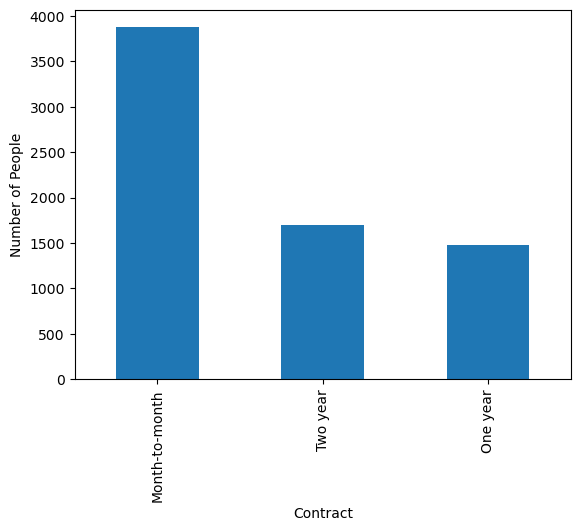

In [17]:
 #entered this so my graph would show as the output 
%matplotlib inline
#Takes the value counts of the column Contract and plots it as a bar graph with Contract as the x-axis
data['Contract'].value_counts().plot.bar() 
plt.xlabel('Contract')
plt.ylabel('Number of People')
_ = plt.ylabel('Number of People')

No     5174
Yes    1869
Name: Churn, dtype: int64

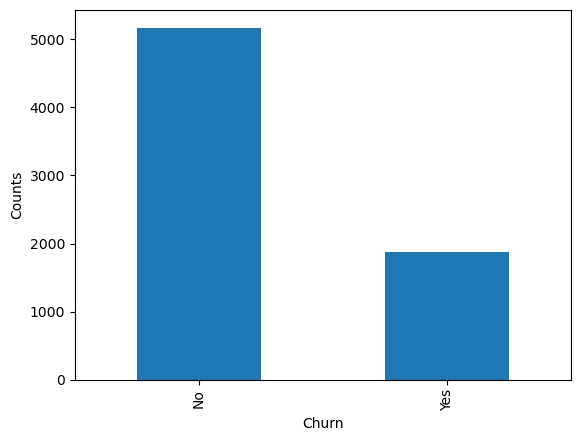

In [18]:
data['Churn'].value_counts().plot.bar()
plt.xlabel('Churn')
plt.ylabel('Counts')
_ = plt.ylabel('Counts')
data['Churn'].value_counts()

<AxesSubplot:xlabel='Frequency', ylabel='tenure'>

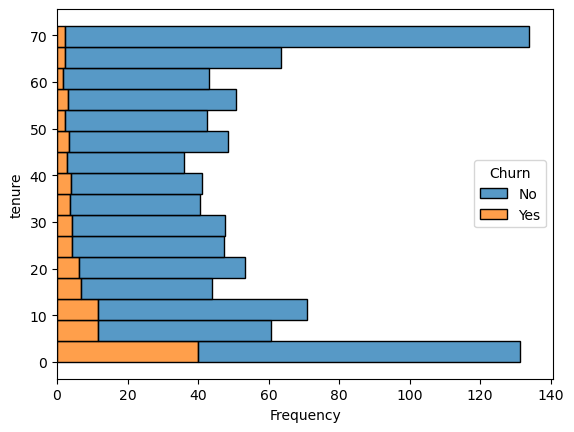

In [19]:
#using seaborn to plot a histogram with the hue being churn value 
import phik
import seaborn as sns
sns.histplot(data = data, y='tenure', hue = 'Churn', stat = 'frequency', multiple='stack')
#we see that shorter the tenure, the more people will churn 

<AxesSubplot:xlabel='Frequency', ylabel='TotalCharges'>

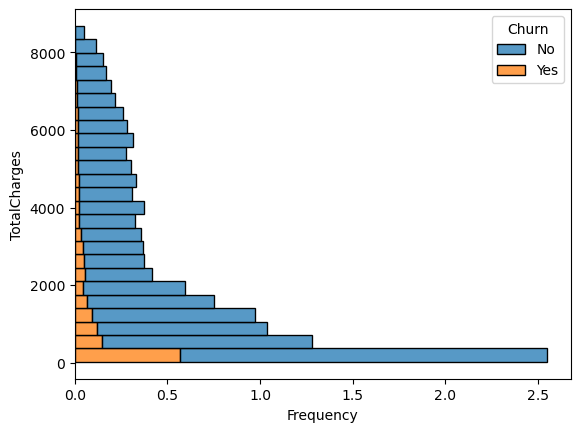

In [20]:
sns.histplot(data = data, y='TotalCharges', hue ='Churn', stat = 'frequency', multiple = 'stack')
#shows the less they are charged total, the more they leave. Yet, it also shows the more they pay, the less people have left. 
#This graph fails to tell us any information on how long these people were customers of the company.
#They may have paid less than $2,000.00, but could it be possible that they left before having the opportunity
#to pay more?  

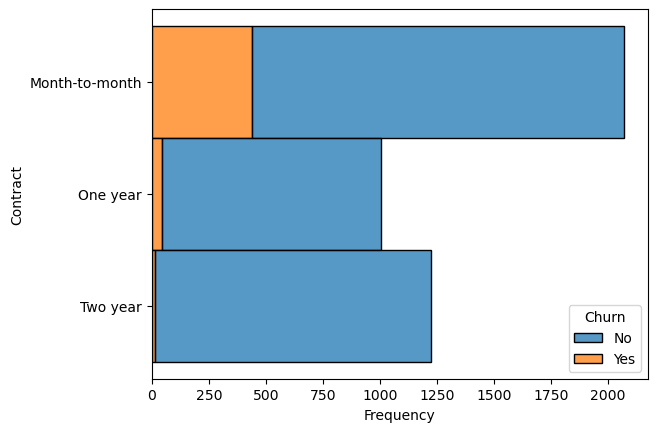

In [21]:
_ = sns.histplot(data=data, y='Contract', hue = 'Churn', stat = 'frequency', multiple = 'stack')
#majority of the people that churned, had the month to month contract. 
#Monthly charges could cost more, so people leave?

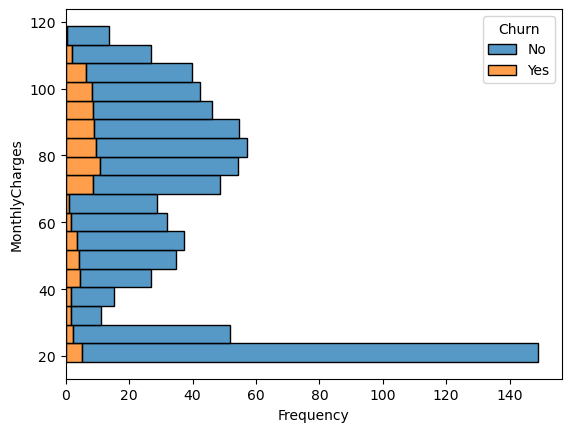

In [22]:
_ = sns.histplot(data=data, y='MonthlyCharges', hue = 'Churn', stat = 'frequency', multiple = 'stack')
#Those paying higher monthly charges have left the company more than those paying less. 

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64
Contract
Month-to-month    66.398490
One year          65.048608
Two year          60.770413
Name: MonthlyCharges, dtype: float64


<AxesSubplot:xlabel='Contract,Churn'>

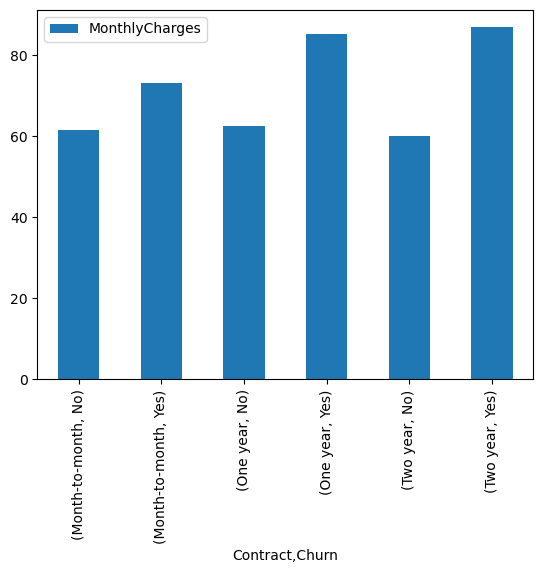

In [89]:
#shows the average monthly cost of those that churned, and they paid more on average. 
#calculagtes the average monthly charges per churn value (yes and no)
average_churn_monthly_cost =data.groupby('Churn')['MonthlyCharges'].mean()
#calculates average monthly charge per contract 
average_contract_monthly_cost = data.groupby('Contract')['MonthlyCharges'].mean()
print(average_churn_monthly_cost)
print(average_contract_monthly_cost)
#data.groupby('Contract')['MonthlyCharges'].mean().plot.bar()
df = data.groupby(['Contract', 'Churn']).agg({'MonthlyCharges':'mean'})
df
df.plot.bar()
#Here, we see that people that have left the company pay more on average for each contract. 

More than two graphs were plotted to try to find the correlation between different values to understand which customers have been leaving the company. The first graph displays that the more customers have the month-to-month contract regardless of churn. We do see, however, that most people are staying with the company. It was also shown that customers with a shorter tenure have left the company more so than those with longer tenures. Furthermore, it was also discovered that the less the total charges were, the more churn. This does spark more questions, as it would make sense for the higher the cost, the more churn. The relationship between monthly charges and frequency was plotted to show that the higher the monthly charges were, the more people left. Lastly, it is also true that the people that churn paid more on average regardless of the type of contract they had. Also, those who stayed with the company pay about the same amount of money regardless of the contract. When comparing the average costs of contracts for those that left the company, two year is more than one year which is more than the month-to-month contract.